Assuming we already have SAT/AP scores and the high schools distances in the file, we would only look for high schools which are in California and we want to filter those schools out first. 

In [1]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
import scipy as sc
from scipy import stats

In [2]:
data = pd.read_csv('data/distances_and_cds.csv')
data.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,distance
0,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,All,14.0,NaN,NaN,3.620000,NaN,NaN,601648.0
1,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,Asian,8.0,NaN,NaN,3.620000,NaN,NaN,601648.0
2,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,Hispanic/ Latino,5.0,NaN,NaN,3.620000,NaN,NaN,601648.0
3,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.12125,4.088571,33037.0
4,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.12125,4.088571,33037.0


check the total number of high schools in our file 

In [3]:
tot_high = len(data['school'].unique())
tot_high

2843

In [4]:
data[data['state']=='California']
data.head()

,campus,year,school,school_num,city,county,state,country,region,ethnicity,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,distance
0,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,All,14.0,NaN,NaN,3.620000,NaN,NaN,601648.0
1,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,Asian,8.0,NaN,NaN,3.620000,NaN,NaN,601648.0
2,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,Los Angeles,Los Angeles,California,USA,Los Angeles,Hispanic/ Latino,5.0,NaN,NaN,3.620000,NaN,NaN,601648.0
3,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,San Francisco,San Francisco,California,USA,San Francisco,All,58.0,8.0,7.0,3.682931,4.12125,4.088571,33037.0
4,Berkeley,1994.0,ABRAHAM LINCOLN HIGH SCHOOL,3833241.0,San Francisco,San Francisco,California,USA,San Francisco,Asian,50.0,8.0,7.0,3.682931,4.12125,4.088571,33037.0


check the total number of high schools in california 

In [5]:
num_cali_high = len(data[data['state']=='California']['school'].unique())
num_cali_high

860

In [6]:
data_cali_high = data[data['state']=='California']
data_cali_high['yield'] = data_cali_high['enr_num'] / data_cali_high['adm_num']
data_cali_high.describe()

/Users/Nelson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,school_num,app_num,adm_num,enr_num,app_gpa,adm_gpa,enr_gpa,distance,yield
count,278029.000000,2.075630e+05,278029.000000,208973.000000,83776.000000,278029.000000,208973.000000,83776.000000,2.332610e+05,83776.000000
mean,2007.508990,2.365212e+06,24.390308,16.130845,12.035511,3.669844,3.884817,3.831920,3.345409e+05,0.482094
std,6.651732,1.528964e+06,31.352837,21.616506,15.655316,0.194324,0.227329,0.226885,2.617145e+05,0.200331
min,1994.000000,1.002550e+05,5.000000,3.000000,3.000000,2.468333,2.798462,2.782000,6.620000e+02,0.044776
25%,2002.000000,1.032150e+06,8.000000,5.000000,5.000000,3.545556,3.720667,3.690000,9.825300e+04,0.333333
50%,2008.000000,1.937564e+06,13.000000,9.000000,7.000000,3.683235,3.892222,3.842462,2.207980e+05,0.473684
75%,2013.000000,3.630407e+06,27.000000,18.000000,13.000000,3.807857,4.068571,3.994419,6.004540e+05,0.615385
max,2017.000000,6.119309e+06,544.000000,472.000000,295.000000,4.356667,4.495000,4.430000,1.348288e+06,1.000000


check how many NaN's are there

In [7]:
count_nan = len(data_cali_high) - data_cali_high.count()
count_nan

campus             0
year               0
school             0
school_num     70466
city               0
county             0
state              0
country            0
region             0
ethnicity          0
app_num            0
adm_num        69056
enr_num       194253
app_gpa            0
adm_gpa        69056
enr_gpa       194253
distance       44768
yield         194253
dtype: int64

filter out the NaN data

In [8]:
data_cali_high = data_cali_high.dropna()

X is to be fixed, it contains the features we want to include. We want to add AP and SAT scores later on 

In [9]:
X = data_cali_high[['app_num', 'adm_num', 'app_gpa', 'adm_gpa', 'year', 'distance']]
y = data_cali_high['yield']

In [10]:
def z_score(x):
    return (x - x.mean()) / x.std()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,app_num,adm_num,app_gpa,adm_gpa,year,distance
211426,393.0,104.0,3.770791,4.165340,2015.0,191397.0
188937,22.0,8.0,3.812642,4.162000,2000.0,779110.0
99919,9.0,6.0,3.463061,3.960000,2016.0,69919.0
61055,48.0,18.0,3.637612,3.963478,2012.0,695856.0
46183,85.0,50.0,3.675000,3.903971,2000.0,30289.0


In [12]:
X_train = z_score(X_train)
y_train = z_score(y_train)
X_test  = z_score(X_test)
y_test  = z_score(y_test)
X_test.head()

,app_num,adm_num,app_gpa,adm_gpa,year,distance
252600,2.341284,2.596981,1.687477,1.274203,1.516679,0.964306
177864,-0.298215,0.094990,-1.555103,-1.182344,1.074407,1.754705
169060,-0.469889,0.181265,-0.909931,-1.362307,0.042441,-0.853888
215412,-0.834698,-0.810903,0.897685,1.212511,1.369255,-0.793059
86362,0.645996,1.000883,-0.208973,0.187838,0.189865,-0.851201


In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lr = regressor.fit(X_train, y_train)

In [14]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['coefficient'])

In [15]:
coeff_df

,coefficient
app_num,0.001697
adm_num,-0.416863
app_gpa,-0.065630
adm_gpa,0.297996
year,-0.096608
distance,-0.194364


In [16]:
y_pred = lr.predict(X_test)

In [17]:
data_result = pd.DataFrame({'Actual Yield': y_test, 'Predicted Yield': y_pred}) 
data_result.head(10)

,Actual Yield,Predicted Yield
252600,-1.155465,-1.143603
177864,-1.358595,-0.735224
169060,-0.536711,-0.260738
215412,1.268844,0.660889
86362,-0.420224,-0.199344
8566,-0.497000,-0.060779
160552,-0.618938,0.103614
86926,-0.572050,-0.975658
80541,-1.418309,-0.542418
824,-1.053624,0.547560


Text(0,0.5,'Predictions (Linear Regression)')

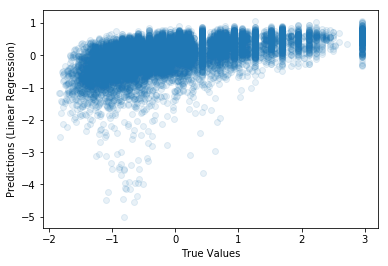

In [26]:
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions (Linear Regression)')

In [19]:
print ('Score:', lr.score(X_test, y_test))

Score: 0.2699255311608597


In [27]:
data_result.shape

(12123, 2)

In [28]:
data_cali_high['year'].unique()

array([1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002.,
       2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011.,
       2012., 2013., 2014., 2015., 2016., 2017.])

Cross Validation Model. 
And here are the steps for the Cross-Validation: 
1. we reserve a sample data
2. train the model using the remaining of the datasets 
3. use the reserve sample of the test(validation) dataset. If our model delivers a positive result on the validation data, then we could go ahead with the current model. 

In [29]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lr, X, y, cv=10)
print('Cross-validated scores:', scores)

Cross-validated scores: [-0.2992258   0.17029796  0.18254877 -0.0667545   0.10899391  0.23793668
 -0.19203792 -0.09397357  0.11008456  0.1195139 ]


Text(0,0.5,'Predictions (10-fold cross-validation)')

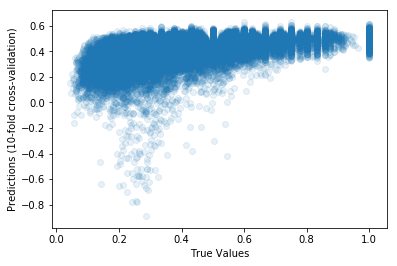

In [34]:
y_cross_pred = cross_val_predict(lr, X, y, cv=10)
plt.scatter(y, y_cross_pred, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions (10-fold cross-validation)')

In [35]:
cross_accuracy = metrics.r2_score(y, y_cross_pred)
print('Cross-Predicted Accuracy:', cross_accuracy)

Cross-Predicted Accuracy: 0.2278907013457191
